In [192]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt

## Question 1

In [193]:
model = hmm.CategoricalHMM()
model.n_components  = 2     # two states: hot and cold days
model.startprob_    = [ 0.8,0.2 ]
model.transmat_     = [ [0.6,0.4] , [0.5,0.5] ]
model.emissionprob_ = [ [0.2,0.4,0.4] , [0.5,0.4,0.1] ]

In [194]:
_,posteriors = model.score_samples([[2,0,2]])
#print(posteriors)

In [195]:
print("The probability of observing 3,1, and 3 ice creams is ", f"{np.exp(model.score([[2], [0], [2]])):0.5}")

The probability of observing 3,1, and 3 ice creams is  0.028562


In [196]:
_,posteriors = model.decode([[2,0,2]])
print(f"The most likely sequence of days to produce observations of 3,1,3 is ", posteriors,
      ". Where 0 is a hot day and 1 is a cold day. The probability of that outcome is ",
      f"{np.exp(_):0.5}")

The most likely sequence of days to produce observations of 3,1,3 is  [0 1 0] . Where 0 is a hot day and 1 is a cold day. The probability of that outcome is  0.0128


## Question 2

In my github at: https://github.com/MiguelAcostaDelVecchio/RandomProcesses/tree/master/Week9

The file name is Step2HW9.pdf

## Question 3

In [197]:
data = np.load("hw_09_data.npy")

# Build an HMM instance and set parameters
gen_model = hmm.GaussianHMM(n_components=4, covariance_type="full").fit(data)

# Generate samples
X, Z = gen_model.sample(500)

/var/folders/q4/sq902pw91nbgxz6d4gj0qbcc0000gn/T/ipykernel_1459/511350008.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


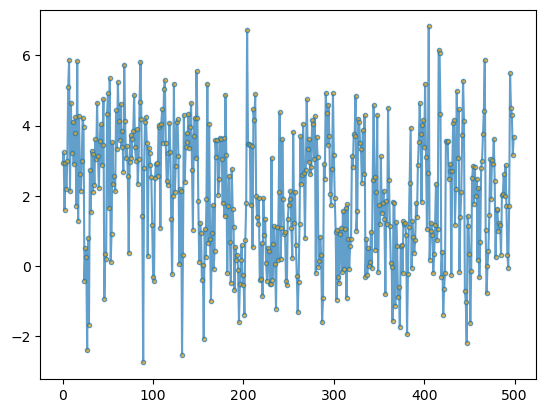

In [198]:
fig, ax = plt.subplots()
ax.plot(X[:, 0], ".-", label="observations", ms=6,
        mfc="orange", alpha=0.7)
fig.show()

In [199]:
scores = list()
models = list()
for n_components in (3, 4, 5):
    for idx in range(10):
        model = hmm.GaussianHMM(n_components=n_components,
                                covariance_type='full',
                                random_state=idx)
        model.fit(X[:X.shape[0] // 2])  # 50/50 train/validate
        models.append(model)
        scores.append(model.score(X[X.shape[0] // 2:]))
        print(f'Converged: {model.monitor_.converged}'
              f'\tScore: {scores[-1]}')

model = models[np.argmax(scores)]
n_states = model.n_components
print(f'The best model had a score of {max(scores)} and {n_states} '
      'states')

states = model.predict(X)

Converged: True	Score: -505.02244814957237
Converged: True	Score: -490.4549973556496
Converged: True	Score: -465.9570941348585
Converged: True	Score: -465.4601561098018
Converged: True	Score: -464.29848045829084
Converged: True	Score: -464.3971920374324
Converged: True	Score: -466.1496955678626
Converged: True	Score: -464.3843895461759
Converged: True	Score: -490.4920626000328
Converged: True	Score: -465.7339584673614
Converged: True	Score: -469.9149055145839
Converged: True	Score: -505.99815766454356
Converged: True	Score: -467.0349115515889
Converged: True	Score: -466.4880943973971
Converged: True	Score: -467.54119928630786
Converged: True	Score: -469.60500000676853
Converged: True	Score: -469.71445263271005
Converged: True	Score: -466.93968643269756
Converged: True	Score: -466.74536662176394
Converged: True	Score: -466.8917080653191
Converged: True	Score: -474.21527802549843
Converged: True	Score: -468.5424893205304
Converged: True	Score: -468.98972718342384
Converged: True	Score: -

/var/folders/q4/sq902pw91nbgxz6d4gj0qbcc0000gn/T/ipykernel_1459/3414787984.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/q4/sq902pw91nbgxz6d4gj0qbcc0000gn/T/ipykernel_1459/3414787984.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


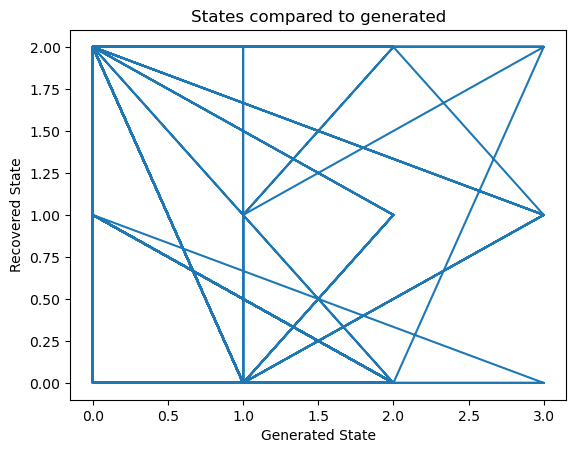

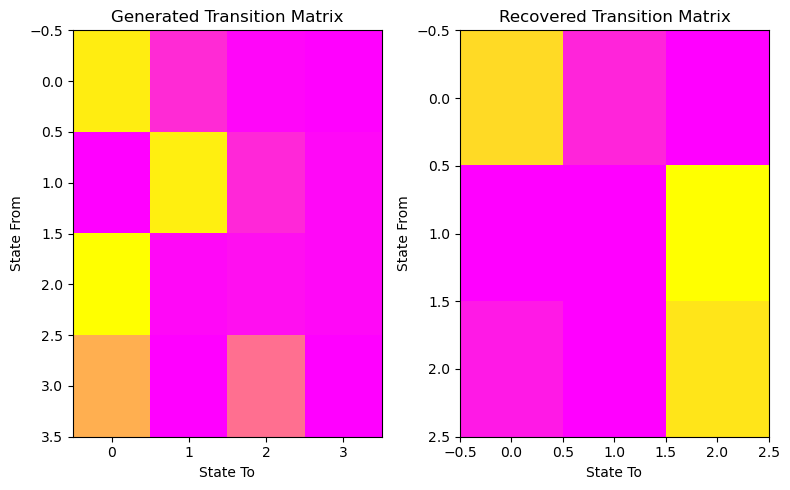

In [200]:
fig, ax = plt.subplots()
ax.plot(Z, states)
ax.set_title('States compared to generated')
ax.set_xlabel('Generated State')
ax.set_ylabel('Recovered State')
fig.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
ax1.imshow(gen_model.transmat_, aspect='auto', cmap='spring')
ax1.set_title('Generated Transition Matrix')
ax2.imshow(model.transmat_, aspect='auto', cmap='spring')
ax2.set_title('Recovered Transition Matrix')
for ax in (ax1, ax2):
    ax.set_xlabel('State To')
    ax.set_ylabel('State From')

fig.tight_layout()
fig.show()